In [1]:
%%js
var cells = Jupyter.notebook.get_cells();
           for (var i = 0; i < cells.length; i++) {
               var cur_cell = cells[i];
               var tags = cur_cell._metadata.tags;
               console.log(i);
               console.log(tags == undefined);
               console.log(tags);
               if (tags != undefined) {
               for (var j = 0; j < tags.length; j++) {
                  if (tags[j]=="book_only" | tags[j]=="remove-cell") {cur_cell.element.hide();}
                  if (tags[j]=="presentation_only") {cur_cell.element.show();}
            }}}

<IPython.core.display.Javascript object>

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.signal as sig
from scipy.integrate import simpson
from IPython.display import SVG, display, IFrame, HTML
import seaborn as sns
import torch
from scipy import misc
%matplotlib notebook
book = False

C:\Users\meyjoh\repos\vlcompimg\compimg\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
%matplotlib inline
book = True

In [4]:
def showFig2(path,i,ending, width, height):
    imgToShow = plt.imread(f"{path}{i}{ending}")
    plt.imshow(imgToShow)

In [5]:
def showFig(path,i,ending, width, height):
    filename = path+str(i)+ending
    return HTML("<img src=\"" + filename +  f"\" style=\"max-height:{height}vh\"/>")

In [6]:
def imshow(img, cmap=None):
    plt.close('all')
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.show()

In [7]:
def imshow2(img, cmap=None):
    #plt.close('all')
    #plt.figure()
    plt.clf()
    plt.imshow(img, cmap=cmap)
    #plt.show()

$\begin{align}
  \newcommand{transp}{^\intercal}
  \newcommand{F}{\mathcal{F}}
  \newcommand{Fi}{\mathcal{F}^{-1}}
  \newcommand{inv}{^{-1}}
  \newcommand{stochvec}[1]{\mathbf{\tilde{#1}}}
  \newcommand{argmax}[1]{\underset{#1}{\mathrm{arg\, max}}}
  \newcommand{argmin}[1]{\underset{#1}{\mathrm{arg\, min}}}
\end{align}$

<font size="7"> Computational Imaging </font><br><br><br>

# Neural Networks for Computational Imaging

##### Content
* Introduction to neural networks
* Principal building blocks 
* Universal approximation theorem
* Optimization of network parameters
* Architectures and loss functions
* Example applications
* Tools, libraries and reading resources

## Introduction to neural networks

* (Artificial) neural networks represent a class of machine learning methods.
* They can be imagined as versatile approximators $\phi_\boldsymbol{\theta}$ of arbitrary, continuous functions $\mathbf{y} = f(\mathbf{x}), \quad f:\mathbb{R}^N \mapsto \mathbb{R}^M,\quad M,N \in \mathbb{N}$, i.e., with $\phi_\boldsymbol{\theta}(\mathbf{x}) \approx f(\mathbf{x})$.
* They are defined by their architecture and the corresponding parameters $\boldsymbol{\theta}$.

* Via a suitable training procedure and a so-called *training set* of example pairs $\mathcal{T} = \left\{ (\mathbf{x}_i, \mathbf{y}_i), i \in \left[ 1,\ldots , N \right]  \right\}$ of input variables $\mathbf{x}_i$ and corresponding output variables $\mathbf{y}_i$, their parameters $\boldsymbol{\theta}$ are optimized so that 
  * $\forall (\mathbf{x},\mathbf{y}) \in \mathcal{T}:\text{dist}(\phi_\boldsymbol{\theta}(\mathbf{x}), \mathbf{y} ) \rightarrow \text{Min.}\,,$ with a suitable distance function $\text{dist}$ and
  * (hopefully) $\text{dist}(\phi_\boldsymbol{\theta}(\mathbf{x}), f(\mathbf{x}) ) \rightarrow \text{Min.}\,,$ for unseen input vectors $\mathbf{x}$, i.e., which are not part of the training set.

* Neural networks have first been described in 1943 by Warren McCulloch and Walter Pitts in their paper "A Logical Calculus of the Ideas Immanent in Nervous Activity".
* Frank Rosenblatt followed their approach and described the so-called *Perceptron* as a fundamental unit of early neural networks.

* Approximately around the year 2010, researchers started to use very deep neural networks, i.e., with many so-called *layers* (more information later) and achieved unprecedented performances on various tasks in the field of machine learning and computer vision.

* An important enabler for this breakthrough were the increase in computing power provided by modern computers, especially by GPUs (graphics processing units), and the availability and usage of huge amounts of training data.

## Principal building blocks

The two fundamental building blocks of neural networks are
* Matrix vector multiplications and
* non-linear functions, also called or *activation functions*.

Multiple instances of these building blocks can be stacked in parallel or consecutively with respect to each other to finally yield a neural network.

### Layers

When stacking linear or non-linear building blocks in parallel, the resulting structure is called a linear, respectively, a non-linear layer (usually either a linear or a non-linear block is stacked in parallel, not a mixture of both).

The way of stacking the individual blocks is called the *architecture* of the neural network.

### Linear layers

In one building block of a linear layer, the input $(x_1, x_2, \ldots, x_N)\transp$ is mapped to the scalar output $y$ via a linear transformation, i.e.,

$\begin{align} 
   y = \sum\limits^{N}_{i=1} w_i \cdot x_i + b \,,
\end{align}$

with $w_i$ denoting the $i$-th so-called *weight*, i.e. parameter, of this block and $b$ denoting the so-called *bias* (also a parameter), i.e., an additive term not depending on the input.

<img src="figures/5/single_block_linear_only.svg" style="max-height:40vh">

When one input is simultaneously processed by $K$ linear blocks, i.e.,

$\begin{align} 
   y_k = \sum\limits^{N}_{i=1} w^k_i \cdot x_i + b^k = \underbrace{\left( w^k_1, w^k_2, \ldots, w^k_N, b^k \right)}_{\mathbf{w}\transp_k} \cdot \underbrace{\begin{pmatrix} 
      x_1 \\ x_2 \\ \vdots \\ x_N \\ 1
   \end{pmatrix}}_{\mathbf{x}}  \,,
\end{align}$

for block $k$, this can be expressed compactly via matrix-vector multiplications:

$\begin{align} 
   \begin{pmatrix} 
      y_1 \\ y_2 \\ \vdots \\ y_K
   \end{pmatrix}
   &= 
   \begin{pmatrix} 
      \qquad \mathbf{w}\transp_1 \qquad  \\ \mathbf{w}\transp_2 \\ \vdots \\ \mathbf{w}\transp_K
   \end{pmatrix} \cdot 
   \begin{pmatrix} 
      x_1 \\ x_2 \\ \vdots \\ x_N \\ 1
   \end{pmatrix} \\
   &= \qquad \quad \mathbf{W} \quad \qquad \cdot \quad  \mathbf{x} \,,
\end{align}$

with $\mathbf{W} \in \mathbb{R}^{K \times (N+1)}$ and $\mathbf{x} \in \mathbb{R}^{(N+1) \times 1}$.

<img src="figures/5/single_layer_linear_only.svg" style="max-height:40vh">

This expression can be further extended for the case when multiple input vectors $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_B$, i.e., a so-called *batch* of size $B$, have to be processed simultaneously:

$\begin{align} 
  \begin{pmatrix} 
    \qquad \mathbf{w}\transp_1 \qquad  \\ \mathbf{w}\transp_2 \\ \vdots \\ \mathbf{w}\transp_K
 \end{pmatrix} \cdot 
 \begin{pmatrix} 
     \\  \\ \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_B    \\ \\ \\
 \end{pmatrix} &= \begin{pmatrix} 
    \mathbf{w}\transp_1 \cdot \mathbf{x}_1 & \mathbf{w}\transp_1 \cdot \mathbf{x}_2 &\cdots &\mathbf{w}\transp_1 \cdot \mathbf{x}_B \\ 
    \mathbf{w}\transp_2 \cdot \mathbf{x}_1 & \mathbf{w}\transp_2 \cdot \mathbf{x}_2 &\cdots &\mathbf{w}\transp_2 \cdot \mathbf{x}_B \\     
    \vdots & \vdots & \ddots & \vdots \\
    \mathbf{w}\transp_K \cdot \mathbf{x}_1 & \mathbf{w}\transp_K \cdot \mathbf{x}_2 &\cdots &\mathbf{w}\transp_K \cdot \mathbf{x}_B \\ 
 \end{pmatrix}\\
 &= \begin{pmatrix} 
  \\  \\ \mathbf{y}_1 & \mathbf{y}_2 & \cdots & \mathbf{y}_B    \\ \\ \\
\end{pmatrix}
 \,.
\end{align}$

Although not fully correct, linear layers are sometimes also referred to as *feed forward layers* or *multi-layer perceptron (MLP)*.

### Non-linear layers

Neural networks constructed only out of linear layers are very limited in their approximation abilities since in essence they just represent a long linear function and hence can only mimic linear functions.

This is why additional, so-called *non-linear layers* consisting of non-linear building blocks are necessary.

In general, a non-linear building block is a non-linear function $\psi:\mathbb{R}\rightarrow \mathbb{R}$ that is applied to the scalar output of a linear building block.

The combination of a linear and a non-linear block then looks like:

<img src="figures/5/single_block.svg" style="max-height:40vh">

And a corresponding layer looks like:

<img src="figures/5/single_layer.svg" style="max-height:40vh">

A popular example for a non-linearity is the so-called *sigmoid*-function 

$\begin{align} 
  \psi(y)=\frac{1}{1+\mathrm{e}^{-y} } \,.
\end{align}$

When choosing high values for $\mathbf{W}$ in the preceding linear block, the sigmoid-function resembles a unit step-function which can be shifted left or right by adjusting the bias $b$:

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))
def plot_sigmoid_after_linear(a,b):
    xs = np.linspace(0,1,1000)
    y1s = xs*a + b
    y2s = sigmoid(y1s)
    plt.clf()
    plt.plot(xs,y2s)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')

In [9]:
plt.figure()
interact(lambda w,b: plot_sigmoid_after_linear(w,b), w=widgets.FloatSlider(min=1,max=200, step=1, value=8), b=widgets.FloatSlider(min=-100,max=100, step=1, value=-4))

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=8.0, description='w', max=200.0, min=1.0, step=1.0), FloatSlider(value…

<function __main__.<lambda>(w, b)>

In batch processing, the result of a batch of data processed by a linear layer, i.e. $\mathbf{y} = \mathbf{Wx}$, is processed by the non-linearity in an element-wise fashion.

#### Other popular non-linear functions

In [10]:
xs = torch.linspace(-3,3,100)
ys_softplus = torch.nn.Softplus()(xs)
ys_leakyrelu = torch.nn.LeakyReLU(negative_slope=0.1)(xs)
ys_elu = torch.nn.ELU()(xs)
ys_relu = torch.nn.ReLU()(xs)
ys_tanh = torch.nn.Tanh()(xs)
ys_sigm = torch.nn.Sigmoid()(xs)

##### Sigmoid

The *sigmoid function*:

$\begin{align} 
   \sigma(x) = \frac{1}{1+\exp(-x)} \,.
\end{align}$

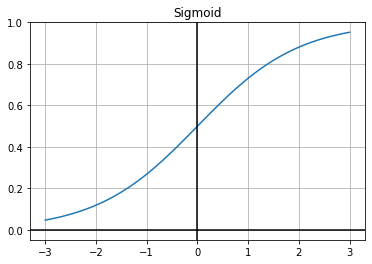

In [11]:
plt.figure()
plt.plot(xs, ys_sigm)
plt.title("Sigmoid")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

##### Rectified linear unit (ReLU)

The *rectified linear unit (ReLU)* with $\mathrm{ReLU}(x) = \max (0,x)$ is a good general purpose activation function.

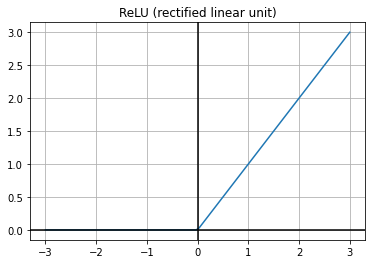

In [12]:
plt.figure()
plt.plot(xs, ys_relu)
plt.title("ReLU (rectified linear unit)")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

##### Softplus

Smooth approximation of the ReLU function:

$\begin{align} 
   y_i = \frac{1}{\beta} \cdot \log \left( 1 + \exp (\beta \cdot x_i) \right) \,,
\end{align}$

with parameter $\beta$.

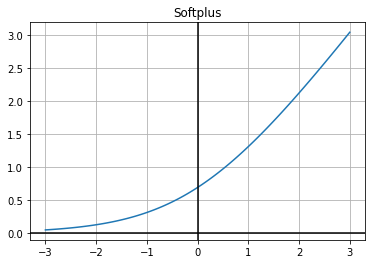

In [13]:
plt.figure()
plt.plot(xs, ys_softplus)
plt.title("Softplus")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

##### Leaky ReLU

Similar to ReLU but with a non-zero slope for negative inputs:

$\begin{align} 
   \mathrm{LeakyReLU}(x) = \begin{cases} 
      x, & \text{if } x \geq 0 \\
      \beta \cdot x, & \text{otherwise}
   \end{cases} \,,
\end{align}$

with the negative slope value $\beta$.

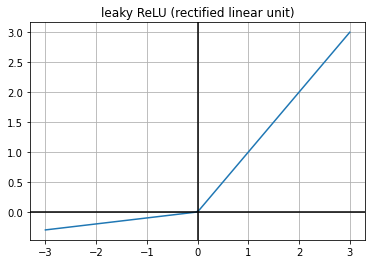

In [14]:
plt.figure()
plt.plot(xs, ys_leakyrelu)
plt.title("leaky ReLU (rectified linear unit)")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

##### Exponential linear unit (ELU)

Another smooth approximation of the ReLU function:

$\begin{align} 
   \mathrm{ELU}(x) = \begin{cases} 
      x, & \text{if } x > 0 \\
      \exp (x) -1 & \text{otherwise} 
   \end{cases}\,.
\end{align}$

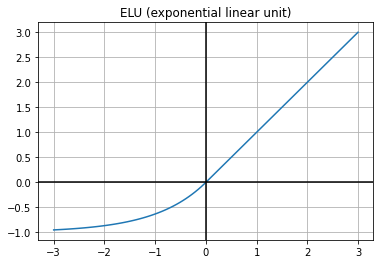

In [15]:
plt.figure()
plt.plot(xs, ys_elu)
plt.title("ELU (exponential linear unit)")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

##### Hyperbolic tangent (tanh)

The *hyperbolic tangent (tanh)* function:

$\begin{align} 
   \mathrm{tanh}(x) = \frac{\exp (x) - \exp (-x)}{\exp (x) + \exp (-x)} \,.
\end{align}$

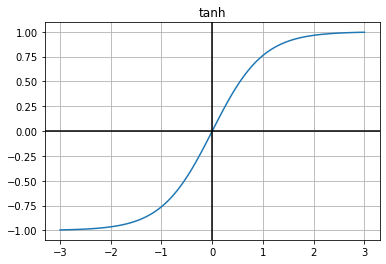

In [16]:
plt.figure()
plt.plot(xs, ys_tanh)
plt.title("tanh")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

### Pooling layers

Pooling layers reduce the size of the input data by selecting or calculating a certain value out of a region of input values and by replacing that whole region by this value.

A common example is *max pooling*. The layer is parameterized via
* its window size $h$ and
* its stride $s$.

The layer shifts a square-shaped window with edge length $h$ over the input data and selects the highest value out of all values covered by the window and returns this value as one of its outputs. Then, the window is shifted by the stride value $s$ and the procedure is repeated until the whole input data has been processed.

In [17]:
interact(lambda i: showFig('figures/5/pooling_layer_',i,'.svg',800,50), i=widgets.IntSlider(min=(min_i:=1),max=(max_i:=5), step=1, value=(max_i if book else min_i)))

interactive(children=(IntSlider(value=5, description='i', max=5, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(i)>

##### Example max pooling with PyTorch:

In [18]:
pooling = torch.nn.MaxPool2d(2,2).float()

In [19]:
tens = torch.tensor(np.ones(4) + np.eye(4)).unsqueeze(0).float()
tens

tensor([[[2., 1., 1., 1.],
         [1., 2., 1., 1.],
         [1., 1., 2., 1.],
         [1., 1., 1., 2.]]])

In [20]:
pooling(tens)

tensor([[[2., 1.],
         [1., 2.]]])

### Convolutional layers

Convolutional layers process their input by convolving it with one or more convolution kernels. 

The coefficients of the convolution kernels also represent parameters of the network which are optimized during training. 

Convolutional layers are mainly parameterized via
* number of kernels (often referred to as *channels*),
* sizes of the kernels,
* their stride $s$ and
* the padding mode (i.e., how to deal with the situation at the borders of the input data when the kernel protrudes the input's support).

In [21]:
interact(lambda i: showFig('figures/5/convolutional_layer_',i,'.svg',800,50), i=widgets.IntSlider(min=(min_i:=0),max=(max_i:=5), step=1, value=(max_i if book else min_i)))

interactive(children=(IntSlider(value=5, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.<lambda>(i)>

Depending on the stride $s$ and the padding mode, convolutional layers can yield outputs of lower spatial dimensions (e.g., smaller images).

Depending on the number of kernels, the output can have a larger or lower number of channels.

##### Channel dimensions

If the input to a convolutional layer has $C$ channels, each filter kernel must also have $C$ channels. Considering one kernel, the individual channels of the input are convolved with the respective channels of that kernel and the results are summed up to yield one channel of the output of the layer. Hence, every kernel yields one channel of the output.

##### $1 \times 1$ convolutions

In order to reduce the channel dimension while processing data in a neural network, so-called $1 \times 1$ *convolutions*, i.e., convolutions with a kernel of size $1 \times 1$ can be employed.

A $1 \times 1$-kernel does not alter the spatial distribution of the data but can reduce the channel dimension if the number of $1 \times 1$-kernels is less than the number of channels of the input data.

```{note}
Sometimes, the results of a convolutional layer are denoted as *features* or *feature maps*.

```

```{note}
In many programming libraries for neural networks, biases (i.e., additive terms) are also added to the results of convolutional layers. This can lead to unexpected results if it is not considered. 
```

### Transposed convolutional layers

Although the name might be a bit misleading, so-called *transposed convolutional layers* can be imagined as a kind of inverse of convolutional layers, in the sense as they increase the spatial resolution of the input.

Transposed convolutional layers are parameterized similarly to convolutional layers, i.e., via
* number of kernels,
* sizes of the kernels,
* their stride $s$ and
* the padding mode.

Every element of the input scales a kernel which yields the values of the output in the spatial region covered by the kernel. The kernel is then shifted by the stride $s$ and the process is repeated with the next value of the input vector. Depending on the stride $s$, there might already be values present in the currently considered region of the output vector. In that case, the new values are additively superposed.

In [22]:
interact(lambda i: showFig('figures/5/transposed_convolutional_layer_',i,'.svg',800,50), i=widgets.IntSlider(min=(min_i:=0),max=(max_i:=3), step=1, value=(max_i if book else min_i)))

interactive(children=(IntSlider(value=3, description='i', max=3), Output()), _dom_classes=('widget-interact',)…

<function __main__.<lambda>(i)>

##### Example transposed convolution with PyTorch:

In [23]:
transposed_convolution = torch.nn.ConvTranspose2d(1,1,3, bias=False).float()
transposed_convolution.weight

Parameter containing:
tensor([[[[ 0.0711,  0.2133,  0.2914],
          [ 0.0717, -0.1584, -0.2190],
          [-0.1029,  0.2455, -0.0764]]]], requires_grad=True)

In [24]:
only_one_tensor = torch.tensor(np.array([[1,0,0],[0,0,0],[0,0,0]])).unsqueeze(0).float()
only_one_tensor

tensor([[[1., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [25]:
transposed_convolution(only_one_tensor)

tensor([[[ 0.0711,  0.2133,  0.2914,  0.0000,  0.0000],
         [ 0.0717, -0.1584, -0.2190,  0.0000,  0.0000],
         [-0.1029,  0.2455, -0.0764,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<SqueezeBackward1>)

In [26]:
eye_tensor = torch.tensor(np.eye(3)).unsqueeze(0).float()
eye_tensor

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])

In [27]:
transposed_convolution(eye_tensor)

tensor([[[ 0.0711,  0.2133,  0.2914,  0.0000,  0.0000],
         [ 0.0717, -0.0874, -0.0057,  0.2914,  0.0000],
         [-0.1029,  0.3172, -0.1638, -0.0057,  0.2914],
         [ 0.0000, -0.1029,  0.3172, -0.2349, -0.2190],
         [ 0.0000,  0.0000, -0.1029,  0.2455, -0.0764]]],
       grad_fn=<SqueezeBackward1>)

### Upsampling layer

Another possibility to increase the spatial resolution of the data is to employ so-called *upsampling layers*. The missing values in the resulting higher-dimensional output are usually calculated via any common interpolation method (e.g., bilinear, nearest neighbor, etc.).

<img src="figures/5/upsampling_layer.svg" style="max-height:40vh">

##### Example upsampling with PyTorch:

In [28]:
upsample_layer = torch.nn.Upsample(scale_factor=(2.0, 2.0)).float()

In [29]:
upsample_layer(torch.tensor(np.eye(3)).float().unsqueeze(0).unsqueeze(0))

tensor([[[[1., 1., 0., 0., 0., 0.],
          [1., 1., 0., 0., 0., 0.],
          [0., 0., 1., 1., 0., 0.],
          [0., 0., 1., 1., 0., 0.],
          [0., 0., 0., 0., 1., 1.],
          [0., 0., 0., 0., 1., 1.]]]])

### Batch normalization layers

It has been shown to be beneficial for the training procedure if the outputs of neural network layers are normalized w.r.t. the mean and variance of the currently processed batch of training data. For this purpose, so-called *batch normalization layers* can be employed.

During every training iteration, they normalize their input vector $\mathbf{x}$ via:

$\begin{align} 
   y_i = \frac{x_i - \mu_i}{\sqrt{\sigma^2_i+ \epsilon}} \cdot \gamma + \beta \,,
\end{align}$

with $\mu_i , \sigma^2_i$ denoting the mean, respectively, the variance of the $i$-th element of the input estimated over the processed batch of training data and $\beta, \gamma$ representing the mean, respectively, the standard deviation assigned after the normalization. The parameters $\beta, \gamma$ can also be learned during training and are typically initialized with $\beta = 0, \gamma = 1$.

Typical implementations of batch normalization layers aggregate the estimated statistics over all training iterations in order to use them when the neural network is evaluated in forward mode.

### Softmax layers

Softmax layers apply the the so-called *softmax* function to their input. The input values are rescaled, so that they sum up to one and can be interpreted as a probability distribution.

The softmax function is defined as:

$\begin{align} 
   \mathrm{Softmax}(x_i) = \frac{\exp (x_i)}{\sum\limits_j \exp (x_j) } \,.
\end{align}$

## Universal approximation theorem

It could be shown, that a neural network consisting only of one (sufficiently large) linear layer and one non-linear layer (together called one *hidden layer*) which are combined by a single linear building block (a so-called *fully connected layer*) can approximate any continuous function. 

In the following, we will sketch the proof of that theorem.

<img src="figures/5/one_hidden_layer.svg" style="max-height:40vh">

Consider again the sigmoid function $\psi$ from before applied to a linear block, i.e., $\psi(wx+b)$  form before. 

The position of the unit step approximated by $\psi$ for high $w$ resides at the position $s=-\frac{b}{w}$. Since this is easier to interpret, we will focus on the parameter $s$ from now on.

We now consider two of such blocks added together by an additional single linear building block, i.e.,

$\begin{align} 
   \psi_{s_1} (x)\cdot w_1 + \psi_{s_2}(x)\cdot w_2  + b
\end{align}$

with the respective positions $s_1, s_2$ of the step functions.

In [30]:
def linear(x, s):
    w = 1000
    b = -1 * w * s
    return x*w + b
def plot_2_neurons(s1, s2, w1, w2):
    xs = np.linspace(0,1,1000)
    y1s = sigmoid(linear(xs, s1))
    y2s = sigmoid(linear(xs, s2))
    res = w1 * y1s + w2 * y2s
    plt.clf()
    plt.plot(xs,res)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')

In [31]:
plt.figure()
interact(lambda s1, s2, w1, w2: plot_2_neurons(s1, s2, w1, w2), \
         s1 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.2), \
         s2 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.6), \
         w1 = widgets.FloatSlider(min=-2,max=2, step=0.1, value=0.4), \
         w2 = widgets.FloatSlider(min=-2,max=2, step=0.1, value=0.6))

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.2, description='s1', max=1.0), FloatSlider(value=0.6, description='s…

<function __main__.<lambda>(s1, s2, w1, w2)>

As can be seen, this addition yields to consecutive step functions what can be used, e.g., to approximate the $\mathrm{rect}$-function.

Therefore, if $s_1 < s_2$, it must hold $w_2 = -w_1$ to get a $\mathrm{rect}$-function with height $h=\left| w_1 \right| = \left| w_2 \right|  $.

We can now add two of such pairs of blocks together to model two $\mathrm{rect}$-functions, i.e., with start, stop positions $s_{1,1}, s_{1,2}$ and height $h_1$ of the first $\mathrm{rect}$-function and $s_{2,1}, s_{2,2}, h_2$ for the second one.

In [32]:
def rect_approx(x, s1, s2, h):
    w1 = h
    w2 = -1 * h
    y1s = sigmoid(linear(x, s1))
    y2s = sigmoid(linear(x, s2))
    return w1 * y1s + w2 * y2s
    
def plot_2_rects(s11, s12, s21, s22, h1, h2):
    xs = np.linspace(0,1,1000)
    y1s = rect_approx(xs, s11, s12, h1)
    y2s = rect_approx(xs, s21, s22, h2)
    res = y1s + y2s
    plt.clf()
    plt.plot(xs,res)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')

In [33]:
plt.figure()
interact(lambda s11, s12, s21, s22, h1, h2: plot_2_rects(s11, s12, s21, s22, h1, h2), \
         s11 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.2), \
         s12 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.3), \
         s21 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.4), \
         s22 = widgets.FloatSlider(min=0.0,max=1.0, step=0.1, value=0.6), \
         h1 = widgets.FloatSlider(min=-2,max=2, step=0.1, value=0.3), \
         h2 = widgets.FloatSlider(min=-2,max=2, step=0.1, value=-0.4))

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.2, description='s11', max=1.0), FloatSlider(value=0.3, description='…

<function __main__.<lambda>(s11, s12, s21, s22, h1, h2)>

The more of these modules we add, the more complicated the shape of the output can be. When the width of the single $\mathrm{rect}$-functions approaches zero and the number of $\mathrm{rect}$-functions approaches infinity, any continuous function can be approximated.

This also holds for higher dimensions.

<ipython-input-8-ee7cdfff0621>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


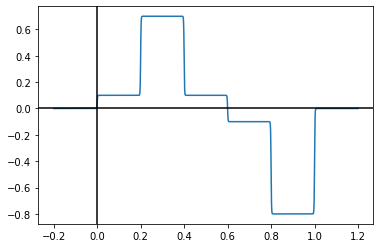

In [34]:
xs = np.linspace(-0.2,1.2,1000)
s1s = np.array([0, 0.2, 0.4, 0.6, 0.8])
s2s = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
hs = np.array([0.1, 0.7, 0.1, -0.1, -0.8])
res = np.zeros_like(xs)

for i in range(0, s1s.shape[0]):
    res = res + rect_approx(xs, s1s[i], s2s[i], hs[i])

plt.figure()
plt.plot(xs,res)
plt.axhline(0, color='k')
plt.axvline(0, color='k')

Although the theorem states that such a simple structure is enough to approximate any function, in practice network structures with more but thinner layers (i.e., with fewer building blocks) are employed as they can achieve similar results with notably fewer building blocks.

## Optimization of network parameters

How can we automatically determine the parameters $\boldsymbol{\theta}$ of the network so that $\forall (\mathbf{x},\mathbf{y}) \in \mathcal{T}:\text{dist}(\phi_\boldsymbol{\theta}(\mathbf{x}), \mathbf{y} ) \rightarrow \text{Min.}\,$?

### Gradient descent

To find this minimum, we compute the gradient $\nabla\text{dist}_\boldsymbol{\theta}$ of the distance function $\text{dist}$ with respect to the network parameters $\boldsymbol{\theta}$.

We can then iteratively update an initial guess $\hat{\boldsymbol{\theta}}_0$ (e.g., random) of the network parameters by pushing it into the inverse direction of the gradient $\nabla\text{dist}_\boldsymbol{\theta}$, i.e., into the direction of the nearest minimum:

$\begin{align} 
   \hat{\boldsymbol{\theta}}_{i+1} \leftarrow \hat{\boldsymbol{\theta}}_{i} - \eta \nabla\text{dist}_\boldsymbol{\theta}(\phi_{\hat{\boldsymbol{\theta}_i}}(\mathbf{X}), \mathbf{Y} )\,, (\mathbf{X},\mathbf{Y}) \in \mathcal{T}
\end{align}$

with $\mathbf{X}, \mathbf{Y}$ indicating batches of multiple training vectors $(\mathbf{x}, \mathbf{y}) \in \mathcal{T}$ and $\eta$ denoting the so-called *learning rate* or the *step size* for the gradient descent updates.

* In every gradient descent iteration, the parameters are updated with regard to the respective batch of training samples $(\mathbf{X}, \mathbf{Y})$ chosen in that iteration.
* In practical scenarios it is usually not possible to process the whole training set in one gradient descent step as the respective data would not fit into the available memory. 
* Hence, in every iteration another batch of training data is used, so that eventually all training samples have been used. The partitioning of $\mathcal{T}$ into those batches is usually performed randomly. This is why this kind of gradient descent is sometimes referred to as *stochastic gradient descent*.
* The set of gradient descent iterations needed to cycle through all training data once is a so-called *epoch*.

### The chain rule and the backpropagation algorithm

Calculating the gradient required for gradient descent by hand can be infeasible for large expressions. Fortunately, this process can be automated as we will see in the following.

We start with an example.

Assume we want to calculate the derivative (i.e., the gradient) of $y = \log (x)^2$ with respect to $x$.

We can express this function via intermediate variables for all basic math operations:

$\begin{align} 
   y &= v_2 \\
   v_2 &= v_1^2 \\
   v_1 &= \log (x) \,.
\end{align}$

In order to find the derivate of $y$ with respect to $x$, we can iteratively apply the chain rule to obtain:

$\begin{align} 
   \frac{\partial y}{\partial x} = \frac{\partial y}{\partial v_2} \frac{\partial v_2}{\partial x} = \frac{\partial y}{\partial v_2} \frac{\partial v_2}{\partial v_1} \frac{\partial v_1}{\partial x} \,.
\end{align}$

Those partial derivatives can easily be obtained for the respective terms:

$\begin{align} 
  \frac{\partial y}{\partial v_2} &= 1 \\
  \frac{\partial v_2}{\partial v_1} &= 2v_1 \\
  \frac{\partial v_1}{\partial x} &= \frac{1}{x}.
\end{align}$

Hence, the sought derivate of $y$ w.r.t. $x$ is given by:

$\begin{align} 
  \frac{\partial y}{\partial x} = \frac{\partial y}{\partial v_2} \frac{\partial v_2}{\partial v_1} \frac{\partial v_1}{\partial x} = 1\cdot 2v_1 \cdot \frac{1}{x} \,.
\end{align}$

This expression can be evaluated in reverse order (the so-called *backward pass*), i.e., from left to right, when the intermediate variables $v_2, v_1$ have been evaluated for some $x$ in the so-called *forward pass*.

When every basic mathematical function (e.g., $+, -, \exp, \log, \sin, \ldots$) also provides a method for the calculation of its gradient, the process of obtaining the derivative of an arbitrary complex expression, with respect to some variable and given the actual input numbers for the parameter(s), can be automated.

During the forward pass, a calculation graph is constructed that represents the hierarchical relations of the individual mathematical functions in terms of the chain rule. The intermediate results for every operation are saved in the nodes of this graph. Then, the graph can be traversed backwards starting from all leaves and intermediate gradient values can be calculated for every node and can then be backpropagated to the root yielding the sought gradient.

This approach is also known as the *backpropagation algorithm*.

##### Example implementation for $y = \log (x)^2$

In [35]:
def square(inp):
    return inp**2

def ln(inp):
    return np.log(inp)

def square_grad(inp, out):
    inp.g = 2*inp*out.g
    
def ln_grad(inp, out):
    inp.g = 1/inp * out.g

In [36]:
def y(x):
    x = torch.tensor(x)
    v1 = ln(x)
    v2 = square(v1)
        
    v2.g = 1
    square_grad(v1, v2)
    ln_grad(x, v1)
    
    return v2, x.g

In [37]:
y(3)

(tensor(1.2069, dtype=torch.float64), tensor(0.7324, dtype=torch.float64))

Note: We just used PyTorch here so that we can easily introduce the property `.g` for all our variables.

### Automatic differentiation

There are various libraries that provide the functionality of backpropagation mentioned above without the user (i.e., the programmer) having to explicitly control it. Often a technique called *operator overloading* is employed that builds the computation graph required for the gradient calculation behind the scenes.

In PyTorch, calculating the gradient of our equation $y = \log (x)^2$ w.r.t. $x$ could be achieved like this:

In [38]:
# Definition of our function using torch-routines:
def y_torch(x):
    return torch.square(torch.log(x))

In [39]:
x = torch.tensor(3.0)    # Our input variable
x.requires_grad = True   # We need the gradient with respect to x

In [40]:
result = y_torch(x)      # Forward pass

In [41]:
result.backward()        # Backward pass

In [42]:
x.grad                   # Access the gradient

tensor(0.7324)

## Architectures and loss functions

During the past 10 years, several multi purpose neural network architectures (or architectural building blocks) have been proposed, which we will discover in the following paragraphs.

Depending on the task a neural network has to perform, i.e., the function it should approximate, appropriate architectures and suitable distance functions $\mathrm{dist}$, so-called *loss functions* $\ell$ for the training, have to be chosen.

### Deep convolutional networks for image classification

In image classification tasks the neural network is supposed to assign a single class label $y$ to a given input image $\mathbf{x}$, e.g. , the result could be a description of the scene visible in the image (e.g., a kitchen).

Hence, typical image classification architectures successively decrease the input's spatial resolution while increasing the channel resolution.

A prominent example are so-called *VGG neural networks* developed at the Visual Geometry Group (VGG) at University of Oxford by Karen Simonyan and Andrew Zisserman (see [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)).

The architecture looks as follows:

<img src="figures/5/VGG_architecture.svg" style="max-height:40vh">

##### Cross-entropy loss

The so-called *cross-entropy loss* is a common loss function for (image) classification scenarios.

When the final layer of a classification neural network yields a vector $\mathbf{y} \in [0,1]^C$ of probabilities for all $C$ possible classes (e.g., obtained via a final softmax layer) and $i \in [1,C]$ represents the index of the correct class, the cross-entropy loss is calculated via:

$\begin{align} 
   \ell_\mathrm{cross} = -\log (y_i) \,.
\end{align}$

```{note}
  In some libraries (e.g., PyTorch), the implementation of the cross-entropy loss automatically applies softmax to its input $\mathbf{x}$ enforcing that all elements $x_i\leq1$ and $\sum_i x_i=1$.
```

### Residual nets / skip connections

In 2016, Kaiming He et al. proposed in their paper [Deep Residual Learning for Image Recognition](https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) to repeatedly introduce so-called *skip connections* which add the output of some layer to the output of a deeper layer as visualized in the following figure:

<img src="figures/5/residual_block.svg" style="max-height:40vh">

It has been shown, that employing this design principle makes networks easier to train and hence enables architectures with more layers.

Intuitively, one could imagine the case where the network should learn the identity function at some layer, i.e., $\mathcal{F}(\mathbf{x}) = \mathbf{x}$. By means of a residual block, it could simply learn $\mathcal{F}(\mathbf{x}) = \mathbf{0}$ and the skip connection would yield $\mathcal{F}(\mathbf{x}) + \mathbf{x} = \mathbf{0} + \mathbf{x} = \mathbf{x}$.

```{note}
  Sometimes, skip connections need to increase the dimension of the input $\mathbf{x}$ so that it matches the dimension of $\mathcal{F}(\mathbf{x})$. This can be done by appending zeros (*zero padding*) or by a learned linear projection.
```

### Encoder / decoder modules

The concept of so-called *encoders* and *decoders* is quite versatile and can be employed in different scenarios. As the names suggest, an encoder transforms the input into another, usually significantly lower dimensional space, the so-called *latent space*, and the decoder tries to reconstruct the original input based on the output of the encoder as precisely as possible. 

When used in concert as just described, such pairs of encoders and decoders are also called *auto encoders*.

During training, usually the reconstruction loss, i.e., a pixel-wise mean squared error between the input $\mathbf{x}$ and the reconstruction $\hat{\mathbf{x}}$ is minimized.

The following figure visualizes the concept:

<img src="figures/5/encoder_decoder.svg" style="max-height:40vh">

Encoders usually involve multiple convolutional and pooling layers to reduce the spatial dimension, whereas decoders heavily rely on transposed convolutions and upsampling layers to increase spatial resolution.

The latent representation of the input can be exploited in various ways, e.g.:

* as a compression of the input to reduce the necessary amount of data or
* to perform denoising, inverse filtering etc. and
* to synthesize new images from the domain of the input data by drawing random vectors in the latent space and by feeding them into the decoder.

##### Mean squared error loss

A straight forward choice of a loss function for such image-to-image-tasks is the *mean squared error (MSE) loss*:

$\begin{align} 
  \ell_\mathrm{MSE} = \frac{1}{N} \left\| \mathbf{Y} - \phi (\mathbf{X}) \right\|^2_2 \,,
\end{align}$

for a given batch $(\mathbf{X},\mathbf{Y}) \in \mathcal{T}$ of training samples and the total number $N$ of elements in $\mathbf{X}$ or $\mathbf{Y}$.

##### Anomaly detection for visual inspection

As the latent representation focuses its limited amount of information on the significant and important aspects of the input images, it usually does not allow to reconstruct fine image details, e.g., like scratches. This can be exploited to detect such material defects by calculating the pixel-wise difference between the reconstruction $\hat{\mathbf{x}}$ and the input $\mathbf{x}$.

##### Variational auto encoders

The loss function used during the training of variational auto encoders includes a second term besides the reconstruction loss that forces the distribution of the latent representations to follow a normal distribution. 

This usually yields better synthesis performance when using the decoder on random samples drawn from the latent space.

### U-Net for segmentation or regression tasks

Named after its macroscopic shape which looks like the letter U, the so-called *U-Net* is a neural network mainly based on convolutional layers that performs a pixel-wise regression. This means that the network consumes images and yields images of the same size with updated pixel values.

The U-Net has been introduced by Olaf Ronneberger et al. in 2015 (see [U-Net: Convolutional Networks for Biomedical Image Segmentation](http://arxiv.org/abs/1505.04597)).

Its main use case is the pixel-wise segmentation of images (i.e., assigning individual class labels to every pixel), however it has also been employed for various other tasks as we will learn later on.

<img src="figures/5/u-net.svg" style="max-height:80vh">

## Example applications

### Denoising with neural networks

For solving the problem of denoising we want a neural network $\phi$ to approximate a function that takes a noisy input image $\mathbf{x} = \mathbf{i} + \mathbf{n}$ and yields the image $\mathbf{i}$ without the noise $\mathbf{n}$:

<img src="figures/5/dnn_denoising.svg" style="max-height:40vh">

Apparently, the input and output dimensions of this network have to match, i.e., 

$\begin{align} 
   \mathrm{dim}\, \mathbf{x} = \mathrm{dim}\, \phi(\mathbf{x})\,.
\end{align}$

Furthermore, the input $\mathbf{x}$ represents an image with pixel values and the output $\phi (\mathbf{x})$ is again an image with pixel values. 

Such a problem to be solved by a neural network, where the output values are continuous, is called a *regression problem*.

Although it might be tempting to create a network that directly encodes the mapping from noisy to clear images, there is another way that showed to be easier to train and to yield better results:

* Train $\phi$ to estimate the noise $\mathbf{n}$ of the input $\mathbf{x} = \mathbf{i} + \mathbf{n}$, i.e., $\phi(\mathbf{x}) = \hat{\mathbf{n}}$,

* then calculate an estimate of the sought noise-free image $\hat{\mathbf{i}} = \mathbf{x} - \hat{\mathbf{n}}$.

This has been done by Kai Zhang et al. (see [Beyond a Gaussian Denoiser: Residual Learning of Deep CNN for Image Denoising](https://ieeexplore.ieee.org/abstract/document/7839189)):

<img src="figures/5/residual_learning_denoising.svg" style="max-height:40vh">

* Another advantage of this method by Zhang is the lack of fully connected layers. This enables that the neural network can be applied to any input size since there are no input size-dependent parameterized structures involved.

### Learned image signal processing unit

See the paper [Learning to See in the Dark](https://openaccess.thecvf.com/content_cvpr_2018/papers/Chen_Learning_to_See_CVPR_2018_paper.pdf) by Chen Chen et al.

### Learned optics for single-shot high-dynamic-range imaging

See the paper [Deep Optics for Single-shot High-dynamic-range Imaging](https://openaccess.thecvf.com/content_CVPR_2020/papers/Metzler_Deep_Optics_for_Single-Shot_High-Dynamic-Range_Imaging_CVPR_2020_paper.pdf) by Metzler et al.

## Tools, libraries and reading resources

* [PyTorch](https://pytorch.org/) famous Python library for neural network development.
* [FastAI](https://www.fast.ai/) high-level API for PyTorch, very informative free online course, book.

##### Archive

In [43]:
def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

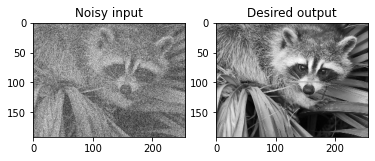

In [44]:
img = cv2.resize(a:=misc.face(gray=True), (int((f:=0.25) * a.shape[1]), int(f*a.shape[0])))
noise = np.random.randn(img.shape[0], img.shape[1]) * 50
plt.subplot(1,2,1,  title="Noisy input")
plt.imshow(normalize(img+noise), cmap='gray')
plt.subplot(1,2,2, title="Desired output")
plt.imshow(normalize(img), cmap='gray')
plt.imsave("noisy.png", img+noise, cmap='gray')
plt.imsave("noise.png", noise, cmap='gray')
plt.imsave("img.png", img, cmap='gray')